<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_2/blob/master/2020_03_25/Questao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related third party imports

In [1]:
from numpy import array, arange
import matplotlib.pyplot as plt

Variaveis globais

In [2]:
a = .0        # Inicio do intervalo da variavel independente 
b = 50.       # Final do intervalo da variavel independente
N = 1e5       # Numero de passos da integracao numerica
h = (b-a)/N   # Tamnho de um passo de integracao

# Graficar y em funcao do tempo

Constantes

In [3]:
SIGMA, R, B = 10, 28, 8/3

In [4]:
def f(r,t):
    """Equacoes de Lorenz:

        dx/dt = SIGMA*(y-x),
        dy/dt = R*x - y - x*z,
        dz/dt = x*y - B*z,

    em que SIGMA, R e B são constantes.

    Positional arguments:
    r -- vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    """
    x, y, z = r[0], r[1], r[2]
    fx, fy, fz = SIGMA*(y-x), R*x-y-x*z, x*y-B*z
    return array([fx,fy,fz], float)

In [5]:
def passo_rk4(f,r,t,h):
    """Calcula um passo no metodo de RK4

    Positional arguments:
    f -- equacao de difereca multidimensional (type function)
    r -- vetor vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    h -- tamnho de um passo de integracao (type float)
    """
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2.*(k2+k3)+k4)/6.

In [6]:
t_rk4 = arange(a,b,h)
x_rk4, y_rk4, z_rk4 = [], [], []

Condicoes iniciais (e.g.: r(a))

In [7]:
ra = array([.0,1.,.0],float)
r = ra

Loop da integracao numerica

In [8]:
for t in t_rk4:
    x_rk4.append(r[0])
    y_rk4.append(r[1])
    z_rk4.append(r[2])
    r += passo_rk4(f,r,t,h)

Plot

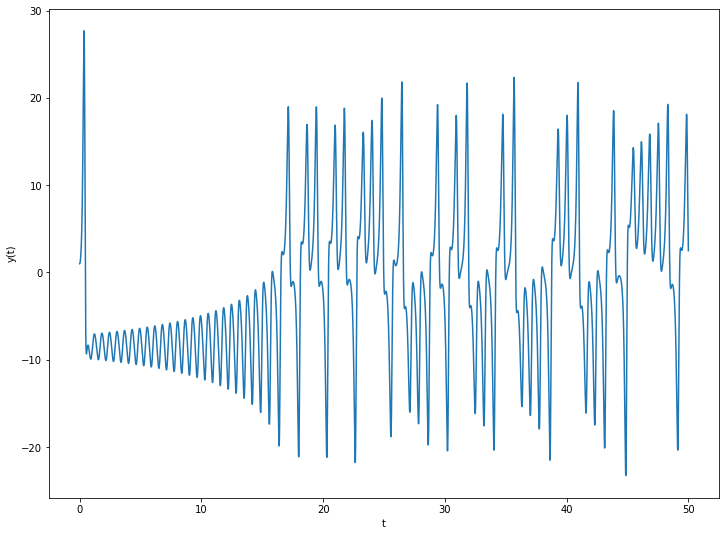

In [9]:
plt.figure(figsize=(12,9))
plt.plot(t_rk4, y_rk4)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

# Graficar z contra x

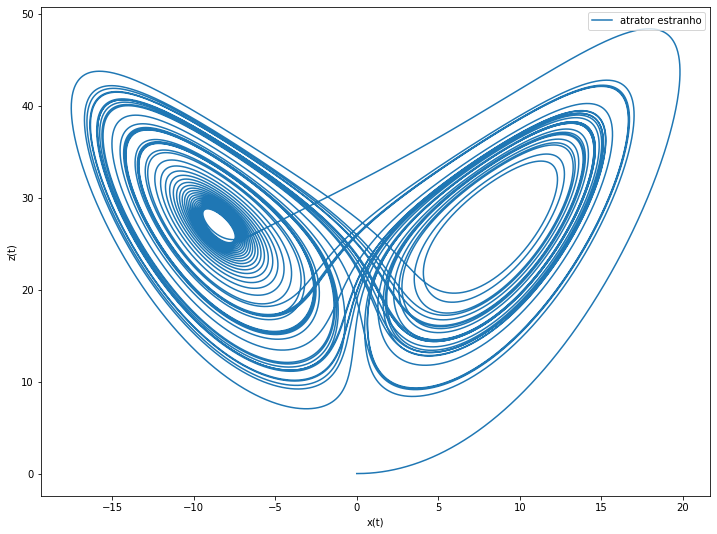

In [10]:
plt.figure(figsize=(12,9))
plt.plot(x_rk4, z_rk4, label="atrator estranho")
plt.xlabel("x(t)")
plt.ylabel("z(t)")
plt.legend(loc='upper right')
plt.show()